### Setting Up

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load in datasets
divorce_df = pd.read_csv('DivorceRates.csv', header=0)
womens_happiness_df = pd.read_csv('WomensHappiness.csv', header=0)
happiness_df = pd.read_csv('Happiness.csv', header=0)

#### Explore Datasets

In [3]:
# Check the shape of each dataframe
print("Divorce & Marriage Rate DF Shape:", divorce_df.shape)
print("Women's Happiness DF Shape:", womens_happiness_df.shape)
print("Overall Happiness DF Shape:", happiness_df.shape)

Divorce & Marriage Rate DF Shape: (105, 7)
Women's Happiness DF Shape: (156, 3)
Overall Happiness DF Shape: (145, 3)


In [4]:
# Check columns and sample values for each dataframe
divorce_df.head()

,Country/region,Continent,Marriage,Divorce,Actual,Percent,Data Source Year
0,Albania,Europe,8.1,1.7,4.76,20.99,(2018)
1,Algeria,Africa,10.1,1.6,6.31,15.84,(2013)
2,Armenia,Europe,6.0,1.0,6.00,16.67,(2011)
3,Australia,Oceania,4.6,2.0,2.30,43.48,(2017)
4,Austria,Europe,5.3,1.8,2.94,33.96,(2018)


In [5]:
womens_happiness_df.head()

,Rank,Country,Score
0,1,Netherlands,99.7
1,2,Norway,99.4
2,3,Sweden,99.2
3,4,Denmark,98.7
4,5,Finland,98.3


In [6]:
happiness_df.head()

,Rank,Country,Happiness Score
0,1,Finland,95.67
1,2,Denmark,95.31
2,3,Iceland,95.29
3,4,Israel,95.20
4,5,Netherlands,95.07


Text(0, 0.5, 'Frequency')

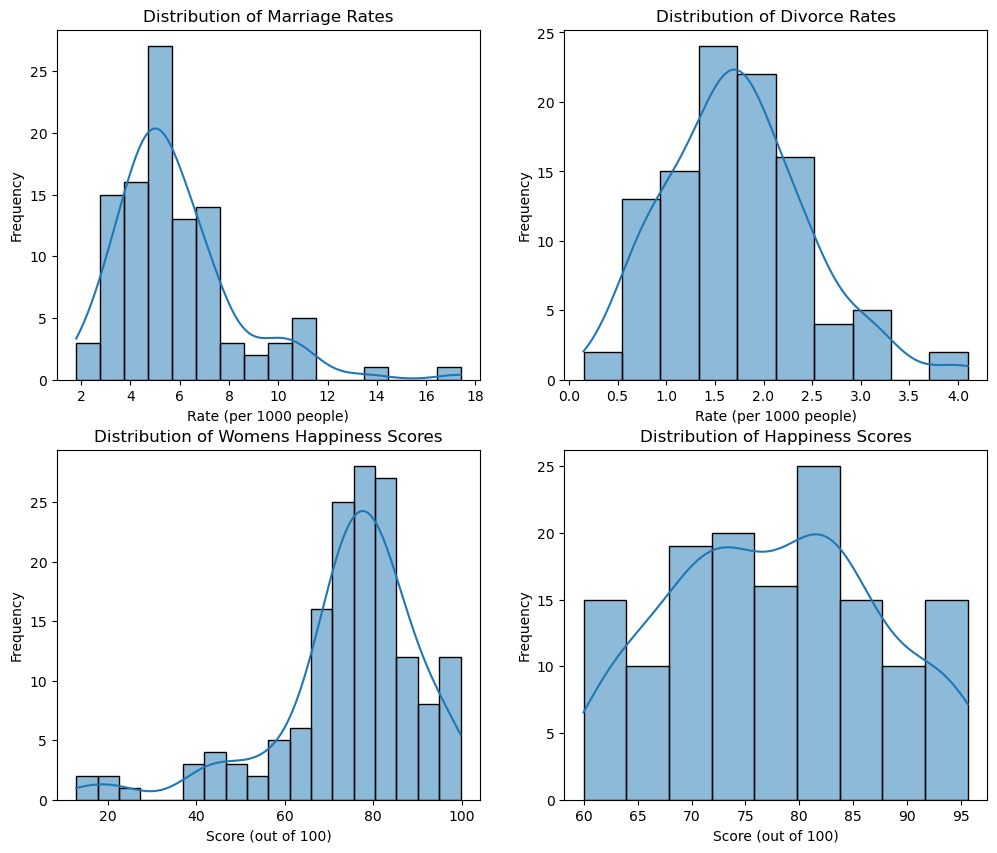

In [7]:
# Plot the distribution of each dataframe
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(divorce_df['Marriage'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Marriage Rates')
axes[0,0].set_xlabel('Rate (per 1000 people)')
axes[0,0].set_ylabel('Frequency')

sns.histplot(divorce_df['Divorce'], kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribution of Divorce Rates')
axes[0,1].set_xlabel('Rate (per 1000 people)')
axes[0,1].set_ylabel('Frequency')


sns.histplot(womens_happiness_df['Score'], kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribution of Womens Happiness Scores')
axes[1,0].set_xlabel('Score (out of 100)')
axes[1,0].set_ylabel('Frequency')


sns.histplot(happiness_df['Happiness Score'], kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribution of Happiness Scores')
axes[1,1].set_xlabel('Score (out of 100)')
axes[1,1].set_ylabel('Frequency')

#### Merge Datasets

In [8]:
# Standardize column names
divorce_df.rename(columns={'Country/region': 'Country'}, inplace=True)

# Rename Rank columns in happiness datasets to set apart from one another
womens_happiness_df.rename(columns={'Rank':'Womens Happiness Rank', 'Score':'Womens Happiness Score'}, inplace=True)
happiness_df.rename(columns={'Rank':'Overall Happiness Rank', 'Score':'Overall Happiness Score'}, inplace=True)

In [9]:
# Merge columns based on Country name
first_merge = pd.merge(divorce_df, womens_happiness_df, on='Country', how='outer')
all_df = pd.merge(first_merge, happiness_df, on='Country', how='outer')
all_df.head(20)

,Country,Continent,Marriage,Divorce,Actual,Percent,Data Source Year,Womens Happiness Rank,Womens Happiness Score,Overall Happiness Rank,Happiness Score
0,Albania,Europe,8.1,1.7,4.76,20.99,(2018),44.0,82.87,83.0,75.56
1,Algeria,Africa,10.1,1.6,6.31,15.84,(2013),104.0,72.74,81.0,76.31
2,Armenia,Europe,6.0,1.0,6.00,16.67,(2011),43.0,82.95,79.0,76.40
3,Australia,Oceania,4.6,2.0,2.30,43.48,(2017),16.0,92.08,12.0,92.79
4,Austria,Europe,5.3,1.8,2.94,33.96,(2018),12.0,95.20,11.0,93.12
5,Azerbaijan,Asia,9.7,1.5,6.47,15.46,(2011),50.0,82.24,140.0,62.22
6,Bahamas,North America,6.1,1.0,6.10,16.39,(2007),74.0,77.55,NaN,NaN
7,Belarus,Europe,9.2,4.1,2.24,44.57,(2011),77.0,77.28,141.0,62.12
8,Belgium,Europe,3.9,2.1,1.86,53.85,(2016),22.0,89.11,17.0,91.30
9,Bermuda,NaN,10.6,2.7,3.93,25.47,(2009),NaN,NaN,NaN,NaN


In [10]:
# Remove rows with NaN values in key variable columns
print("Shape before dropping NaN in key variables:",all_df.shape)
all_df.dropna(subset=['Marriage', 'Divorce', 'Womens Happiness Score', 'Happiness Score'], inplace=True)
print("Shape afted dropping NaN in key variables:",all_df.shape)

Shape before dropping NaN in key variables: (182, 11)
Shape afted dropping NaN in key variables: (79, 11)


In [11]:
all_df['Marriage'].describe()

count    79.000000
mean      5.767848
std       2.248264
min       1.800000
25%       4.400000
50%       5.200000
75%       6.800000
max      13.500000
Name: Marriage, dtype: float64

In [12]:
all_df[all_df['Marriage'] == all_df['Marriage'].median()]

,Country,Continent,Marriage,Divorce,Actual,Percent,Data Source Year,Womens Happiness Rank,Womens Happiness Score,Overall Happiness Rank,Happiness Score
37,Hungary,Europe,5.2,1.7,3.06,32.69,(2018),33.0,85.08,51.0,82.26
47,Kuwait,Asia,5.2,2.2,2.36,42.31,(2010),111.0,71.15,144.0,60.64
58,Mexico,North America,5.2,0.9,5.78,17.31,(2009),38.0,83.79,36.0,84.52
77,Serbia,Europe,5.2,1.4,3.71,26.92,(2018),36.0,84.64,45.0,83.22


In [13]:
all_df[all_df['Womens Happiness Score'] == all_df['Womens Happiness Score'].min()]

,Country,Continent,Marriage,Divorce,Actual,Percent,Data Source Year,Womens Happiness Rank,Womens Happiness Score,Overall Happiness Rank,Happiness Score
39,Iran,Asia,11.2,1.6,7.0,14.29,(2017),134.0,61.62,101.0,72.65


In [14]:
all_df[all_df['Womens Happiness Score'] == all_df['Womens Happiness Score'].max()]

,Country,Continent,Marriage,Divorce,Actual,Percent,Data Source Year,Womens Happiness Rank,Womens Happiness Score,Overall Happiness Rank,Happiness Score
62,Netherlands,Europe,3.7,1.8,2.06,48.65,(2018),1.0,99.7,5.0,95.07


#### Correlation of All Variables

/var/folders/6c/n3_vzccn4135d386wzvcn09w0000gn/T/ipykernel_55551/3458135015.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_corr_matrix = all_df.corr()


Text(0.5, 1.0, 'Correlation Heatmap between All Variables')

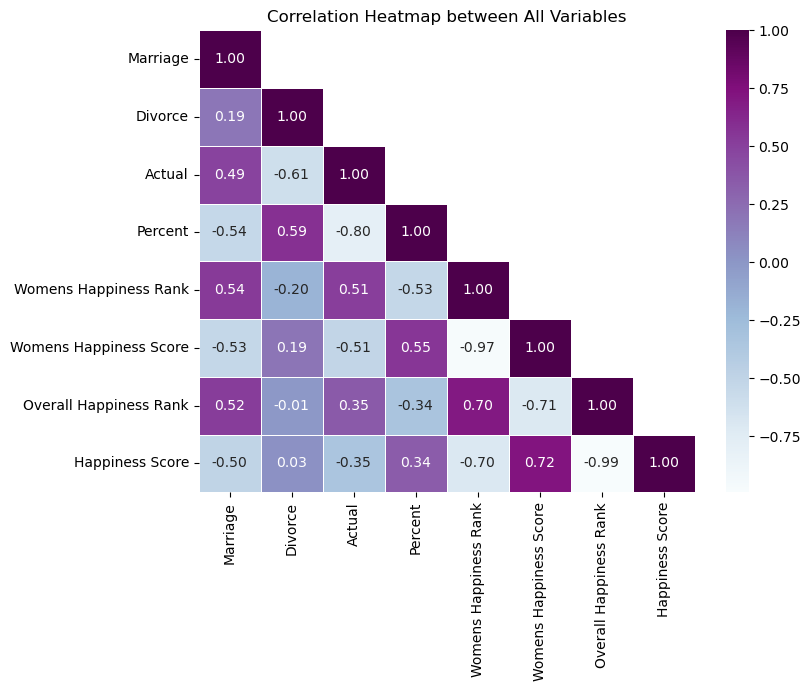

In [15]:
# Create a correlation matrix on the dataframe
all_corr_matrix = all_df.corr()

# Create a heatmap with the correlation matrix
plt.figure(figsize=(8, 6)) 
# Create a mask to show only the upper triangle to avoid repeat values 
mask = np.triu(np.ones_like(all_corr_matrix, dtype=bool), k=1)
sns.heatmap(all_corr_matrix, mask=mask, annot=True, cmap='BuPu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between All Variables')

#### Correlation of Key Variables

<Axes: >

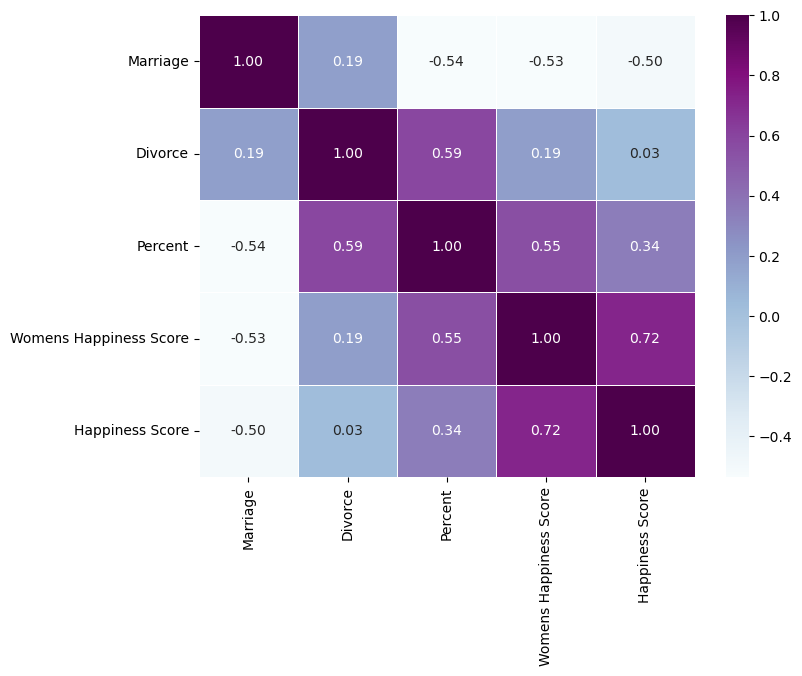

In [16]:
# Create a correlation matrix for the key variables in the dataframe
key_vars = ['Marriage', 'Divorce', 'Percent', 'Womens Happiness Score', 'Happiness Score']
key_df = all_df[key_vars]
key_corr_matrix = key_df.corr()

# Create a heatmap with the correlation matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(key_corr_matrix, annot=True, cmap='BuPu', fmt=".2f", linewidths=0.5)

#### Pairwise Correlation with Select Variables

In [17]:
# Create subsets setting apart variables that we want to compare
subset1 = ['Marriage', 'Divorce', 'Percent']
subset2 = ['Womens Happiness Score', 'Happiness Score']

# Create a dataframe with the correlations between each variable in subset 1 and each in subset 2
pair_corr = pd.DataFrame(
    {col2: [all_df[col1].corr(all_df[col2]) for col1 in subset1] for col2 in subset2},
    index=subset1
)

pair_corr

,Womens Happiness Score,Happiness Score
Marriage,-0.533440,-0.498622
Divorce,0.192743,0.031512
Percent,0.550526,0.341646


<Axes: >

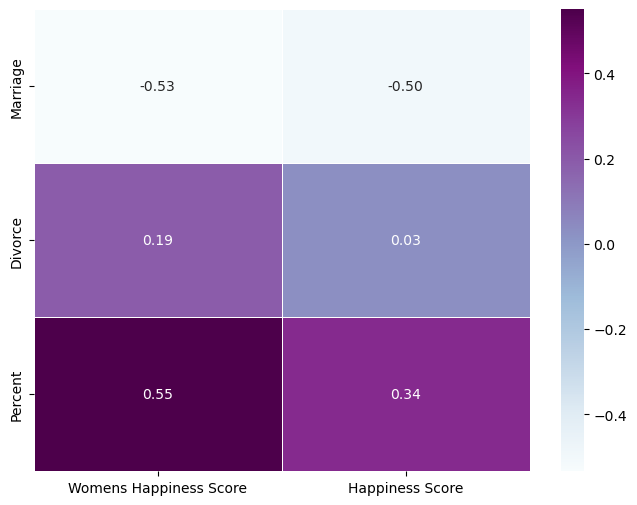

In [18]:
# Plot correlation matrix on a heatmap 
plt.figure(figsize=(8, 6)) 
sns.heatmap(pair_corr, annot=True, cmap='BuPu', fmt=".2f", linewidths=0.5)

### Cross-Cultural Examination

#### By Region

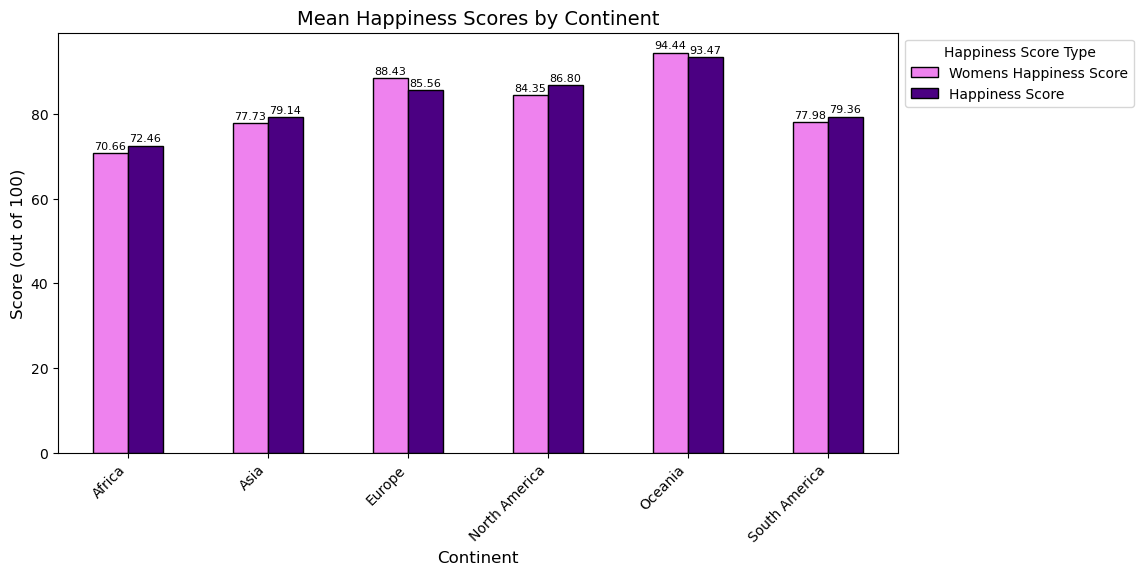

In [19]:
# Select key variables for analysis
select_vars = [
    'Womens Happiness Score', 
    'Happiness Score'
]

# Group by continent and calculate mean for selected variables
continent_stats = all_df.groupby('Continent')[select_vars].mean()

# Plot mean happiness scores by continent
fig, ax = plt.subplots(figsize=(10, 6))

# Build the bar plot
continent_stats[['Womens Happiness Score', 'Happiness Score']].plot(
    kind='bar', 
    color=['violet', 'indigo'], 
    edgecolor='black', 
    ax=ax
)

# Add title and axes labels
plt.title('Mean Happiness Scores by Continent', fontsize=14)
plt.ylabel('Score (out of 100)', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')

# Add labels to the bars to see the values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=8, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Slightly adjust the layout to add more space between elements for better readability
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, left=0.01, right=0.85, top=0.9)  # Adds space around the plot

# Move the legend outside the plot area to avoid crowding
plt.legend(title="Happiness Score Type", fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

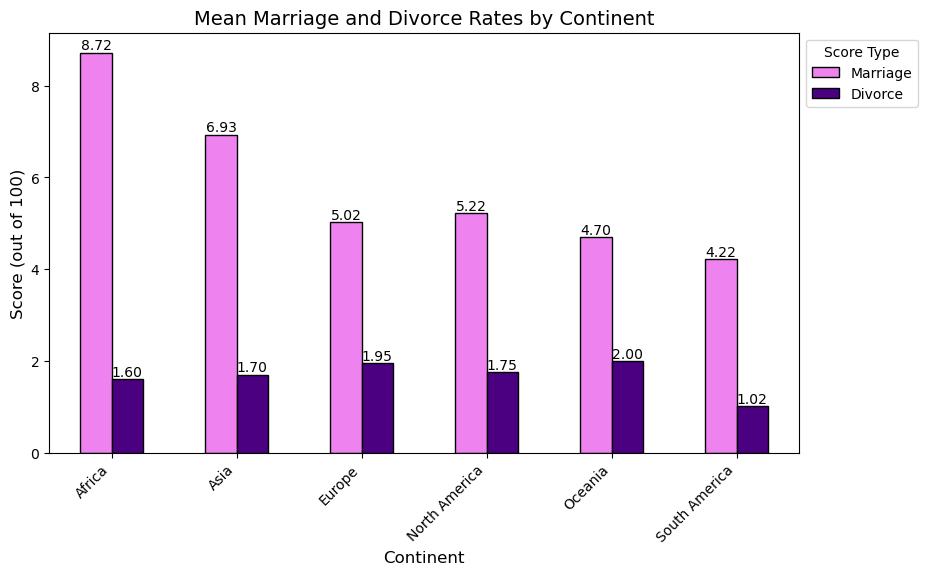

In [20]:
# Select key variables for analysis (Marriage and Divorce scores)
select_vars = [
    'Marriage', 
    'Divorce'
]

# Group by continent and calculate mean for selected variables
continent_stats = all_df.groupby('Continent')[select_vars].mean()

# Plot mean marriage and divorce scores by continent
fig, ax = plt.subplots(figsize=(10, 6))

# Build the bar plot
continent_stats[['Marriage', 'Divorce']].plot(
    kind='bar', 
    color=['violet', 'indigo'], 
    edgecolor='black', 
    ax=ax
)

# Add title and axes labels
plt.title('Mean Marriage and Divorce Rates by Continent', fontsize=14)
plt.ylabel('Score (out of 100)', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')

# Add labels to the bars to see the values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Slightly adjust the layout to add more space between elements for better readability
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, left=0.1, right=0.85, top=0.9)  # Adds space around the plot

# Move the legend outside the plot area
plt.legend(title="Score Type", fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


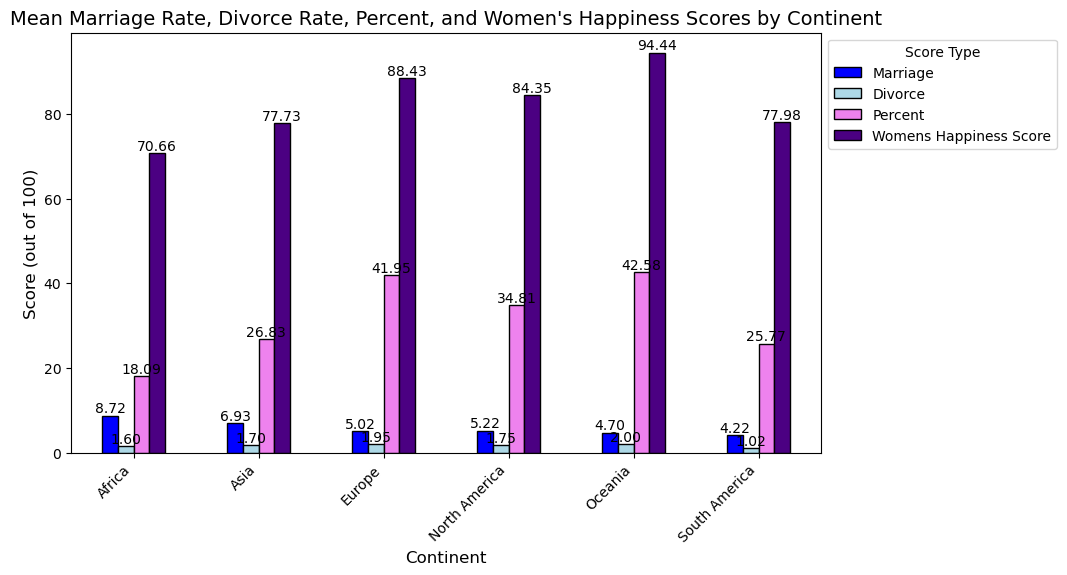

In [21]:
# Select key variables for analysis (Marriage, Divorce, Percent, Women's Happiness Score)
select_vars = [
    'Marriage', 
    'Divorce', 
    'Percent', 
    'Womens Happiness Score'
]

# Group by continent and calculate mean for selected variables
continent_stats = all_df.groupby('Continent')[select_vars].mean()

# Plot mean scores by continent
fig, ax = plt.subplots(figsize=(10, 6))

# Build the bar plot for all selected variables
continent_stats[['Marriage', 'Divorce', 'Percent', 'Womens Happiness Score']].plot(
    kind='bar', 
    color=['blue','lightblue', 'violet', 'indigo'], 
    edgecolor='black', 
    ax=ax
)

# Add title and axes labels
plt.title('Mean Marriage Rate, Divorce Rate, Percent, and Women\'s Happiness Scores by Continent', fontsize=14)
plt.ylabel('Score (out of 100)', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')

# Add labels to the bars to see the values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Slightly adjust the layout to add more space between elements for better readability
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, left=0.1, right=0.85, top=0.9)  # Adds space around the plot

# Move the legend outside the plot area
plt.legend(title="Score Type", fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### By Country

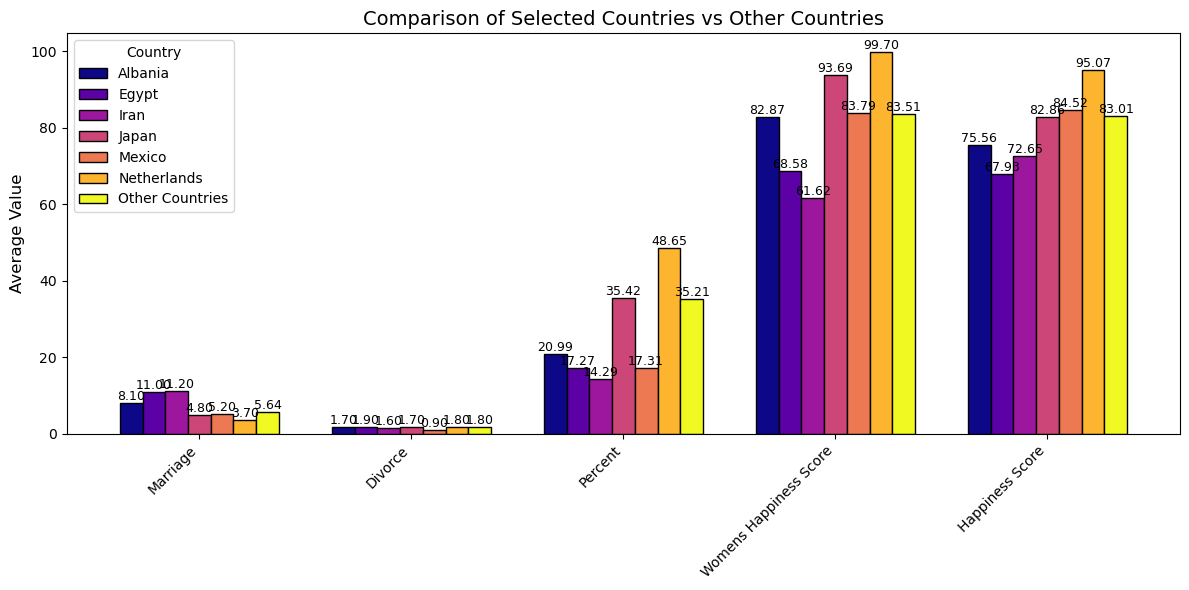

In [22]:
# Define Key Variables
key_vars = ['Marriage', 'Divorce', 'Percent', 'Womens Happiness Score', 'Happiness Score']

# Define the list of selected countries
selected_countries = ['Albania', 'Japan', 'Iran', 'Netherlands', 'Mexico', 'Egypt']

# Calculate the average values for the selected countries
selected_countries_data = all_df[all_df['Country'].isin(selected_countries)].groupby('Country')[key_vars].mean()

# Calculate the average values for all other countries
other_countries_data = all_df[~all_df['Country'].isin(selected_countries)][key_vars].mean()

# Combine the selected countries data with the "other countries" data
comparison_data = pd.concat(
    [selected_countries_data, pd.DataFrame({'Other Countries': other_countries_data}).T]
)

# Plotting the bar chart
ax = comparison_data.T.plot(
    kind='bar', 
    width=0.75, 
    figsize=(12, 6), 
    colormap='plasma',  # Use the Plasma colormap from https://matplotlib.org/stable/users/explain/colors/colormaps.html
    edgecolor='black'
)

# Adding the title, labels, and legend
plt.title('Comparison of Selected Countries vs Other Countries', fontsize=14)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', fontsize=10)

# Add value labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

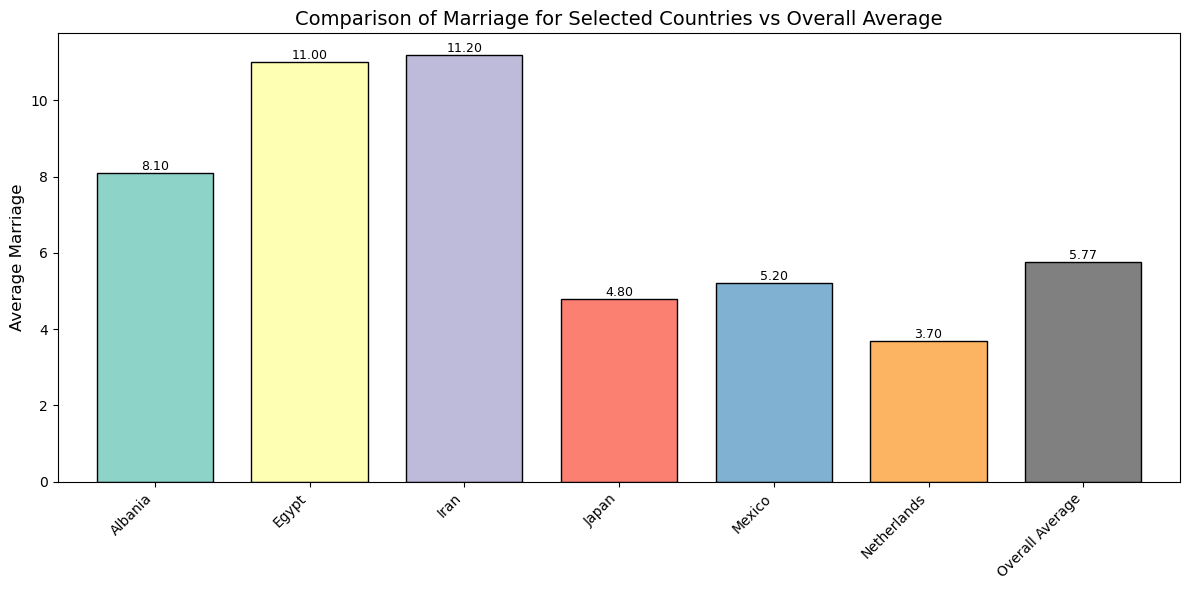

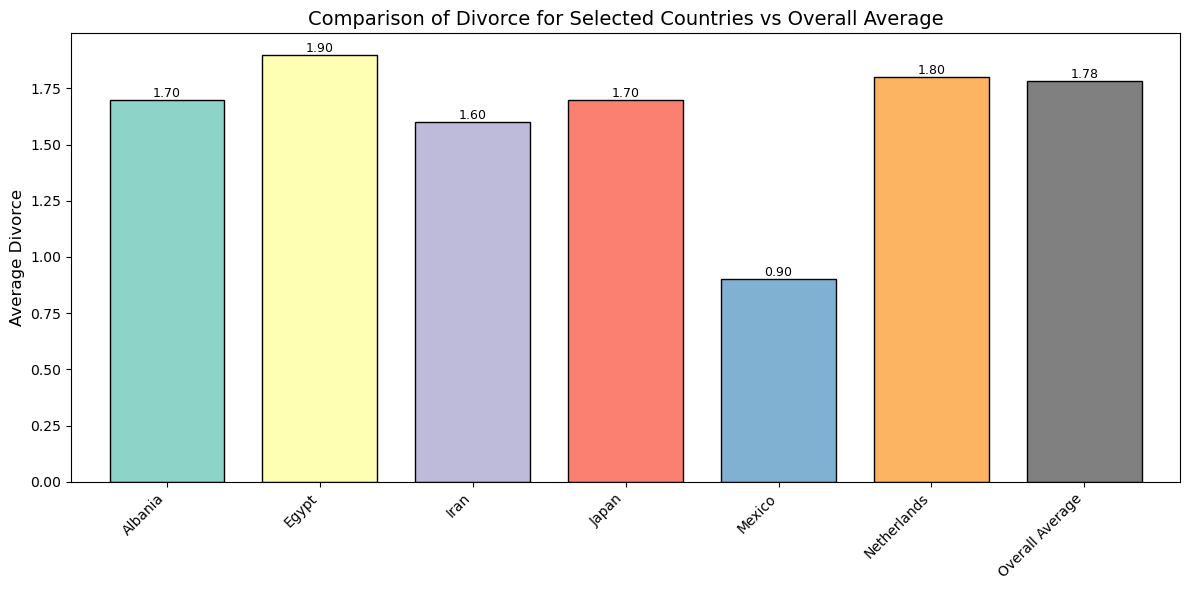

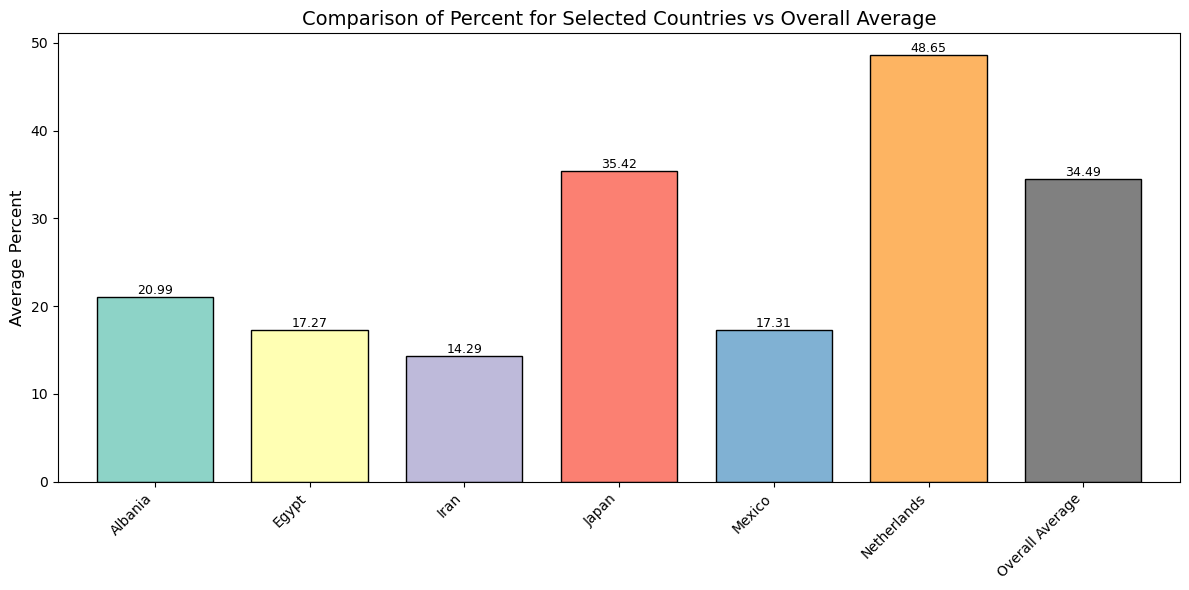

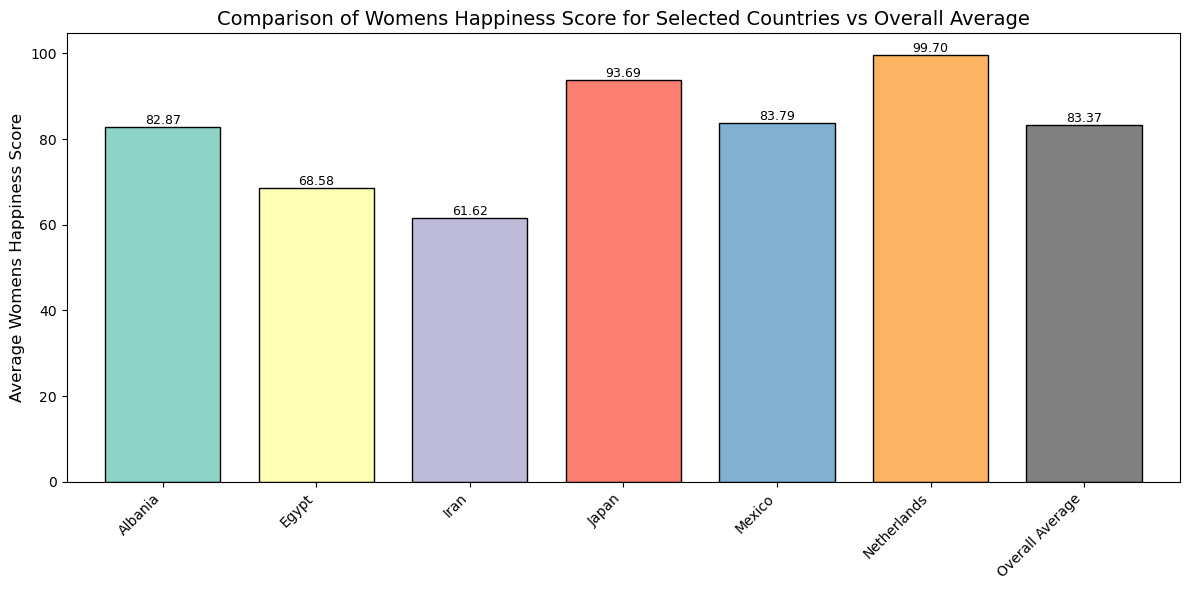

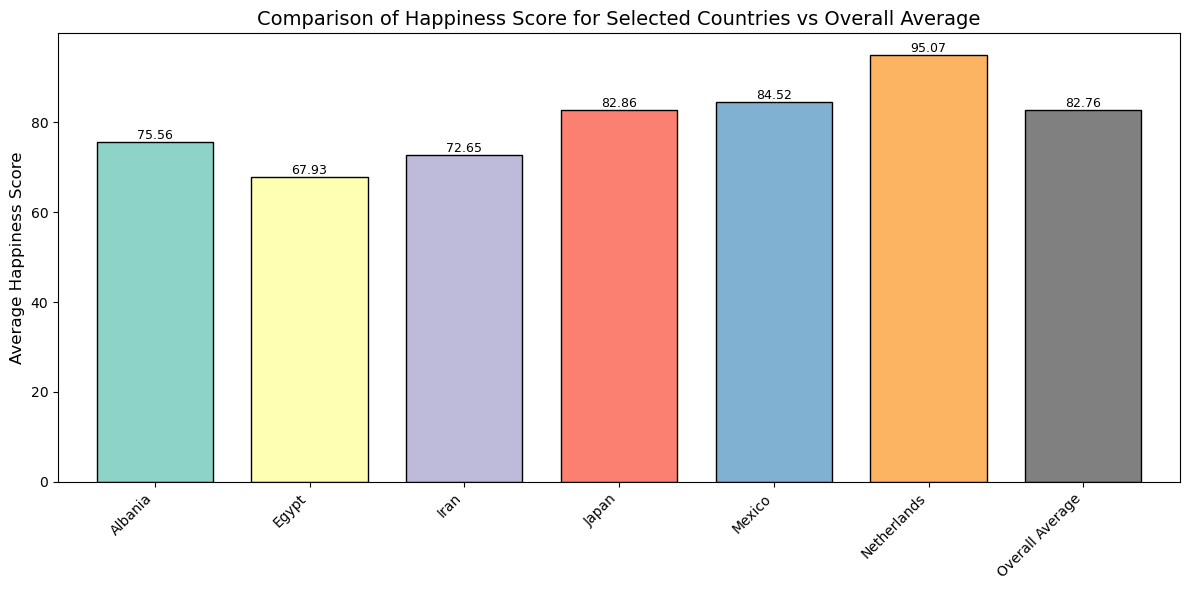

In [23]:
# Define Key Variables
key_vars = ['Marriage', 'Divorce', 'Percent', 'Womens Happiness Score', 'Happiness Score']

# Define the list of selected countries
selected_countries = ['Albania', 'Japan', 'Iran', 'Netherlands', 'Mexico', 'Egypt']

# Calculate the average values for the selected countries
selected_countries_data = all_df[all_df['Country'].isin(selected_countries)].groupby('Country')[key_vars].mean()

# Calculate the overall average values (including selected countries)
overall_data = all_df[key_vars].mean()

# Loop through each key variable and plot separately
for key in key_vars:
    selected_data = selected_countries_data[key]
    
    # Create a df for the "Overall Average"
    overall_average_data = pd.Series({'Overall Average': overall_data[key]})
    
    # Combine the selected countries data with the overall average data
    comparison_data = pd.concat([selected_data, overall_average_data])

    color_map = plt.colormaps['Set3']
    colors = list(color_map(range(len(selected_countries)))) + ['gray']  # Gray for "Overall Average"
    
    # Plotting the bar chart for each country and the overall average
    fig, ax = plt.subplots(figsize=(12, 6))
    comparison_data.plot(kind='bar', width=0.75, color=colors, edgecolor='black', ax=ax)

    # Add title, labels
    ax.set_title(f'Comparison of {key} for Selected Countries vs Overall Average', fontsize=14)
    ax.set_ylabel(f'Average {key}', fontsize=12)
    ax.set_xticklabels(comparison_data.index, rotation=45, ha='right')
    
    # Add value labels to the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)
        
    plt.tight_layout()
    plt.show()

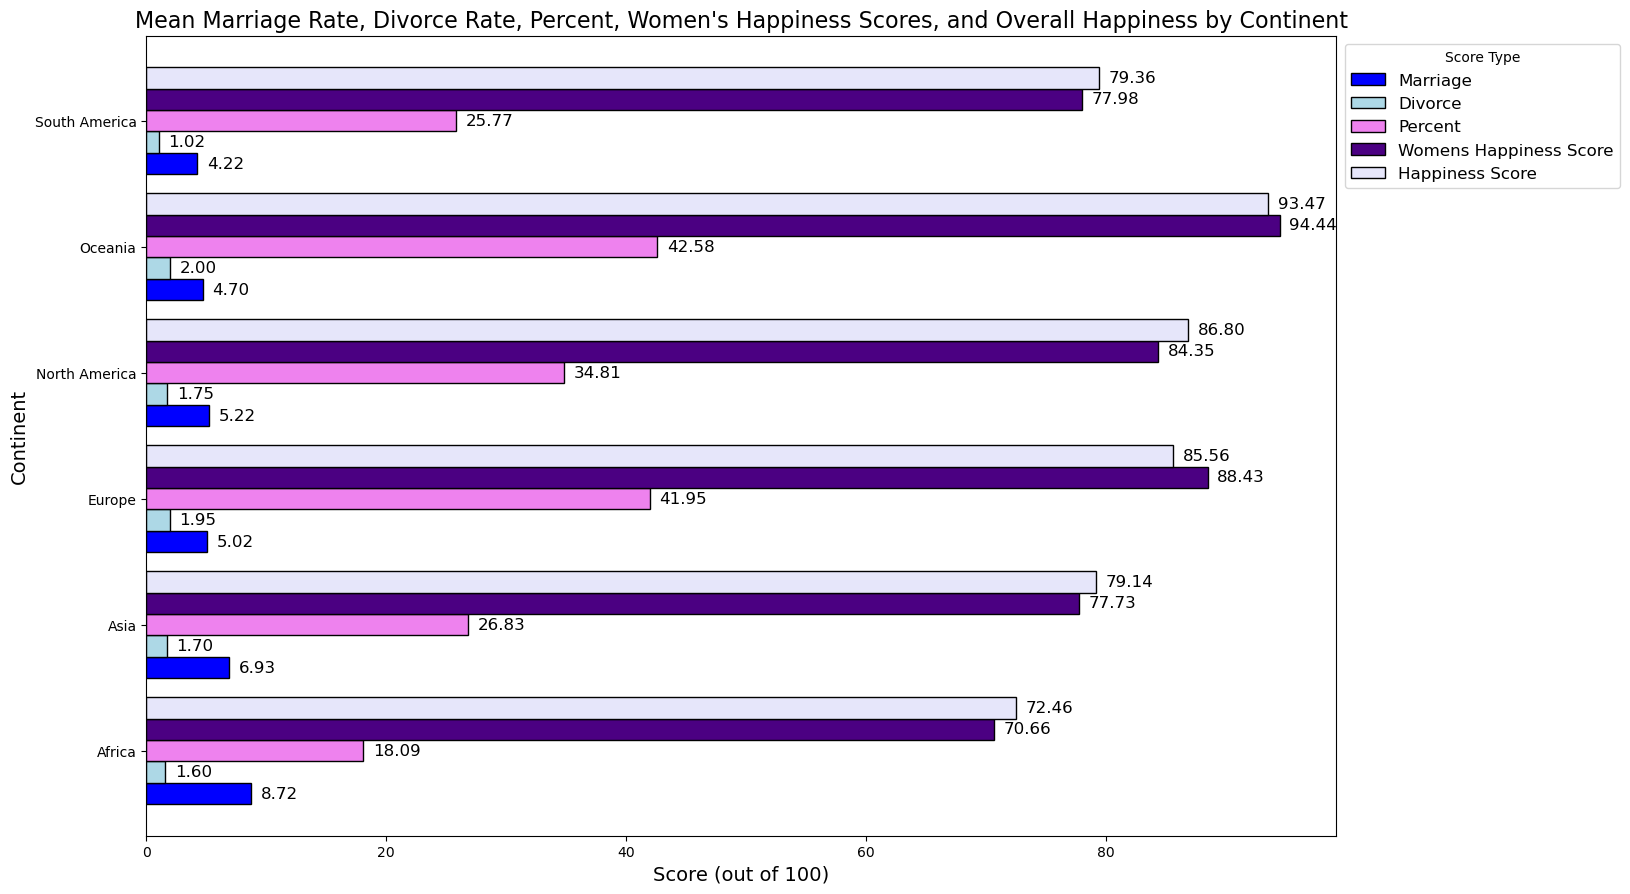

In [24]:
# Select key variables for analysis
select_vars = [
    'Marriage', 
    'Divorce', 
    'Percent', 
    'Womens Happiness Score', 
    'Happiness Score'
]

# Group by continent and calculate mean for selected variables
continent_stats = all_df.groupby('Continent')[select_vars].mean()

# Plot the mean scores by continent
fig, ax = plt.subplots(figsize=(14, 10))

# Build the horizontal bar plot
continent_stats[['Marriage', 'Divorce', 'Percent', 'Womens Happiness Score', 'Happiness Score']].plot(
    kind='barh', 
    color=['blue','lightblue', 'violet', 'indigo', 'lavender'], 
    edgecolor='black', 
    ax=ax,
    width=0.85
)

# Add title and axes labels
plt.title('Mean Marriage Rate, Divorce Rate, Percent, Women\'s Happiness Scores, and Overall Happiness by Continent', fontsize=16)
plt.xlabel('Score (out of 100)', fontsize=14)
plt.ylabel('Continent', fontsize=14)

# Add labels to the bars to see the values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                fontsize=12, color='black', 
                xytext=(7, 0), textcoords='offset points')  # Adjusted space to the right of bars

# Adjust layout for more spacing between elements for better readability
plt.tight_layout()
plt.subplots_adjust(left=0.15, right=1, top=0.9, bottom=0.1)  # More space around the plot so nothing overlaps

# Move the legend outside the plot area so it's not too crowded
plt.legend(title="Score Type", fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
